# 🌸 Clustering Analysis on Breast Cancer Dataset

---


We will explore clustering techniques (K-Means, Hierarchical, Mean Shift) on the Iris dataset using different preprocessing techniques. We’ll evaluate the clusters using Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index.

In [1]:
# 📦 Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 🌼 Step 2: Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = bc.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


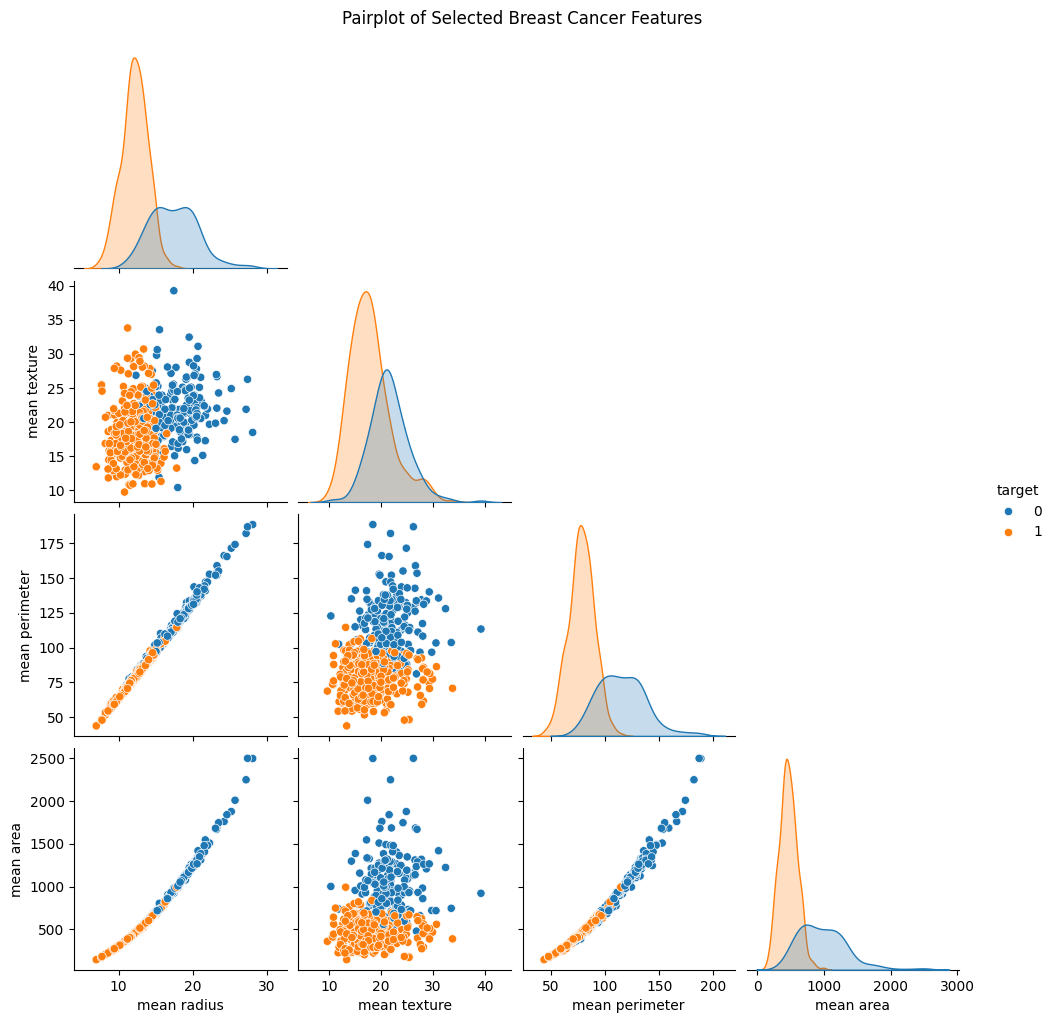

In [3]:
# 📊 Pairplot visualization of the Breast Cancer dataset (subset of features)
import seaborn as sns
df_viz = X[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].copy()
df_viz['target'] = y
sns.pairplot(df_viz, hue='target', corner=True)
plt.suptitle('Pairplot of Selected Breast Cancer Features', y=1.02)
plt.show()

In [4]:
# ⚙️ Step 3: Define preprocessing functions
def normalize_data(data):
    return StandardScaler().fit_transform(data)

def transform_data(data):
    transformer = FunctionTransformer(np.log1p)
    return transformer.fit_transform(data)

def apply_pca(data, n=2):
    return PCA(n_components=n).fit_transform(data)

In [5]:
# 🔍 Step 4: Evaluation Function
def evaluate_clustering(X, labels):
    s = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    return s, ch, db

In [7]:
# 🔁 Step 5: Perform clustering with different preprocessing methods
results = []
methods = ["Raw", "Normalized", "Transformed", "PCA", "T+N", "T+N+PCA"]

for method in methods:
    if method == "Raw":
        data = X
    elif method == "Normalized":
        data = normalize_data(X)
    elif method == "Transformed":
        data = transform_data(X)
    elif method == "PCA":
        data = apply_pca(X)
    elif method == "T+N":
        data = normalize_data(transform_data(X))
    elif method == "T+N+PCA":
        data = apply_pca(normalize_data(transform_data(X)))

    for c in [3, 4, 5]:
        try:
            # KMeans
            km = KMeans(n_clusters=c, random_state=42).fit(data)
            s, ch, db = evaluate_clustering(data, km.labels_)
            results.append(["KMeans", method, c, s, ch, db])
        except:
            continue

        # Agglomerative Clustering - This block was incorrectly indented
        try:
            from sklearn.cluster import AgglomerativeClustering # This import should be outside the loop
            agg = AgglomerativeClustering(n_clusters=c).fit(data)
            s, ch, db = evaluate_clustering(data, agg.labels_)
            results.append(["Agglomerative", method, c, s, ch, db])
        except:
            continue

results_df = pd.DataFrame(results, columns=["Algorithm", "Preprocessing", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
results_df.head()

,Algorithm,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMeans,Raw,3,0.646764,1246.260758,0.632905
1,Agglomerative,Raw,3,0.508254,1089.929436,0.631429
2,KMeans,Raw,4,0.542010,1447.250379,0.610283
3,Agglomerative,Raw,4,0.509003,1245.567625,0.609063
4,KMeans,Raw,5,0.512754,1614.769384,0.618778


In [8]:
# 📊 Step 6: Plot results
pivot_table = results_df.pivot_table(index=['Algorithm', 'Preprocessing'],
                                     columns='Clusters',
                                     values=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
pivot_table

Calinski-Harabasz                            \
Clusters                                    3            4            5   
Algorithm     Preprocessing                                               
Agglomerative Normalized           182.173946   138.090491   116.735045   
              PCA                 1089.940195  1369.419450  1421.906479   
              Raw                 1089.929436  1245.567625  1541.859498   
              T+N                  178.807765   142.396789   126.876316   
              T+N+PCA              457.815297   416.305957   393.395702   
              Transformed          554.958312   452.211829   389.991223   
KMeans        Normalized           196.900133   158.612111   118.825631   
              PCA                 1257.735705  1464.720322  1648.841375   
              Raw                 1246.260758  1447.250379  1614.769384   
              T+N                  190.333179   162.832401   142.267611   
              T+N+PCA              489.766796   452.023837   438.064927   
              Transformed          607.884837   508.410430   447.104589   

                            Davies-Bouldin                     Silhouette  \
Clusters                                 3         4         5          3   
Algorithm     Preprocessing                                                 
Agglomerative Normalized          1.556390  1.484833  1.624716   0.330097   
              PCA                 0.615082  0.586194  0.592308   0.518864   
              Raw                 0.631429  0.609063  0.611407   0.508254   
              T+N                 1.653142  2.051249  1.907071   0.290524   
              T+N+PCA             1.007925  1.137068  1.056044   0.443683   
              Transformed         1.070496  1.285173  1.352324   0.297684   
KMeans        Normalized          1.539447  1.492757  1.429576   0.315186   
              PCA                 0.628456  0.599408  0.608064   0.648303   
              Raw                 0.632905  0.610283  0.618778   0.646764   
              T+N                 1.418921  1.871319  1.785945   0.334826   
              T+N+PCA             0.918214  1.079570  0.921576   0.480906   
              Transformed         1.081318  1.194191  1.270568   0.312832   

                                                 
Clusters                            4         5  
Algorithm     Preprocessing                      
Agglomerative Normalized     0.298199  0.243404  
              PCA            0.527390  0.478405  
              Raw            0.509003  0.511445  
              T+N            0.137695  0.110658  
              T+N+PCA        0.301424  0.287823  
              Transformed    0.210963  0.191754  
KMeans        Normalized     0.274158  0.164548  
              PCA            0.546657  0.511013  
              Raw            0.542010  0.512754  
              T+N            0.180345  0.175985  
              T+N+PCA        0.340257  0.336078  
              Transformed    0.261867  0.226887

In [9]:
# --- Clustering Evaluation Setup ---
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
import pandas as pd

# Ensure X is defined as your input data matrix before this block

def evaluate_clustering(X, labels):
    return {
        'Silhouette': silhouette_score(X, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X, labels),
        'Davies-Bouldin': davies_bouldin_score(X, labels)
    }

def preprocess_data(X, method):
    scaler = StandardScaler()
    transformer = PowerTransformer()
    pca = PCA(n_components=2)

    if method == 'none':
        return X
    elif method == 'normalize':
        return scaler.fit_transform(X)
    elif method == 'transform':
        return transformer.fit_transform(X)
    elif method == 'pca':
        return pca.fit_transform(X)
    elif method == 't+n':
        return scaler.fit_transform(transformer.fit_transform(X))
    elif method == 't+n+pca':
        return pca.fit_transform(scaler.fit_transform(transformer.fit_transform(X)))

def run_all_evaluations(X):
    preprocessings = ['none', 'normalize', 'transform', 'pca', 't+n', 't+n+pca']
    cluster_range = [3, 4, 5]

    results = {
        'KMeans': [],
        'Hierarchical': [],
        'MeanShift': []
    }

    for method in preprocessings:
        X_proc = preprocess_data(X, method)

        for k in cluster_range:
            try:
                km = KMeans(n_clusters=k, random_state=0).fit(X_proc)
                km_metrics = evaluate_clustering(X_proc, km.labels_)
                results['KMeans'].append((method, k, *km_metrics.values()))
            except:
                results['KMeans'].append((method, k, 'NA', 'NA', 'NA'))

            try:
                hc = AgglomerativeClustering(n_clusters=k).fit(X_proc)
                hc_metrics = evaluate_clustering(X_proc, hc.labels_)
                results['Hierarchical'].append((method, k, *hc_metrics.values()))
            except:
                results['Hierarchical'].append((method, k, 'NA', 'NA', 'NA'))

        # Mean Shift (only once per method since it determines clusters automatically)
        try:
            ms = MeanShift().fit(X_proc)
            ms_metrics = evaluate_clustering(X_proc, ms.labels_)
            results['MeanShift'].append((method, len(set(ms.labels_)), *ms_metrics.values()))
        except:
            results['MeanShift'].append((method, 'NA', 'NA', 'NA', 'NA'))

    # Convert to DataFrames
    km_df = pd.DataFrame(results['KMeans'], columns=['Preprocessing', 'Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
    hc_df = pd.DataFrame(results['Hierarchical'], columns=['Preprocessing', 'Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
    ms_df = pd.DataFrame(results['MeanShift'], columns=['Preprocessing', 'Estimated Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

    display(km_df.pivot(index='Preprocessing', columns='Clusters', values='Silhouette'))
    display(hc_df.pivot(index='Preprocessing', columns='Clusters', values='Silhouette'))
    display(ms_df)

    return km_df, hc_df, ms_df

# Run the evaluations
kmeans_df, hierarchical_df, meanshift_df = run_all_evaluations(X)


Clusters,3,4,5
Preprocessing,,,
none,0.646764,0.543859,0.510527
normalize,0.315186,0.162732,0.166670
pca,0.648303,0.546657,0.511013
t+n,0.223227,0.168428,0.151512
t+n+pca,0.378316,0.343681,0.337079
transform,0.223227,0.168428,0.151512


Clusters,3,4,5
Preprocessing,,,
none,0.508254,0.509003,0.511445
normalize,0.330097,0.298199,0.243404
pca,0.518864,0.527390,0.478405
t+n,0.197580,0.148301,0.141210
t+n+pca,0.391416,0.290771,0.321008
transform,0.197580,0.148301,0.141210


,Preprocessing,Estimated Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,none,6,0.626982,637.98661,0.512191
1,normalize,14,0.265385,23.944172,1.169971
2,transform,2,0.244417,16.735696,1.195079
3,pca,6,0.62895,642.019848,0.512252
4,t+n,2,0.244417,16.735696,1.195079
5,t+n+pca,NA,NA,NA,NA
